# Изучение библиотеки Seaborn

[Библиотека Seaborn](https://seaborn.pydata.org/examples/index.html)

In [238]:
from sklearn import tree
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
players = pd.read_csv('csv/players.csv')

In [4]:
players.head(1)

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8


In [390]:
df = sns.load_dataset("anscombe")
diamonds = sns.load_dataset("diamonds")
fmri = sns.load_dataset("fmri")
penguin = sns.load_dataset("penguins")
dots = sns.load_dataset("dots")
tips = sns.load_dataset("tips")
dfe = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
planets = sns.load_dataset("planets")
flights_wide = sns.load_dataset("flights").pivot("year", "month", "passengers")
geyser = sns.load_dataset("geyser")


In [6]:
players = players.rename(columns={'Unnamed: 0':'Index', 'Markey Value In Millions(£)':'Price'})

In [97]:
test_play1 = players.query("Club == 'Bayern Munich' or Club == 'Real Madrid'or Club == 'Liverpool FC'or Club == 'Arsenal FC'")
test_play2 = test_play1.query("Country == 'Spain' or Country == 'Germany' or Country == 'Brazil'or Country == 'England'")
test_play3 = players.query("Country == 'England' or Country == 'France'")
test_play3 = test_play3.query("Club == 'Tottenham Hotspur' or Club == 'Arsenal FC' or Club == 'Manchester United' or Club == 'Manchester City'")

## Anscombe’s quartet
[sns.lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)

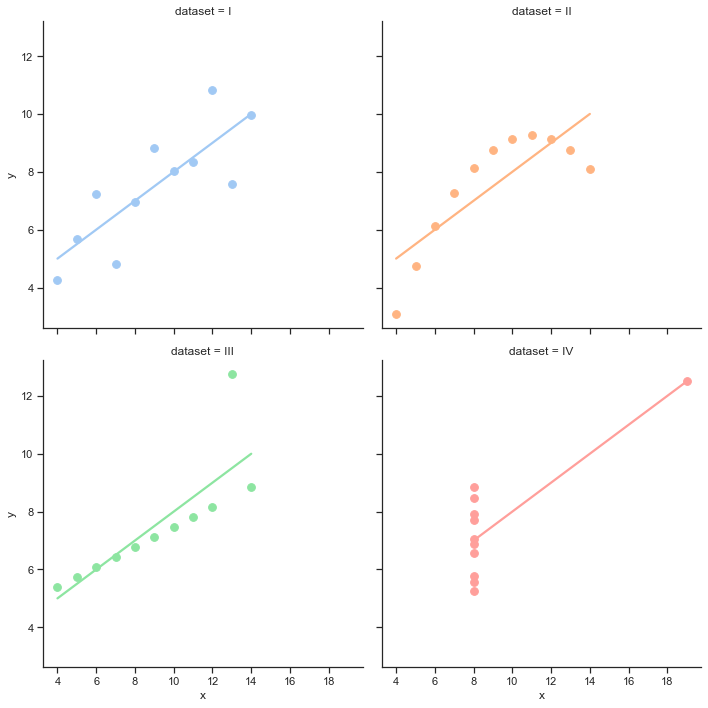

In [8]:
sns.set_theme(style="ticks")
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="pastel", height=5,
           scatter_kws={"s": 60, "alpha": 1})

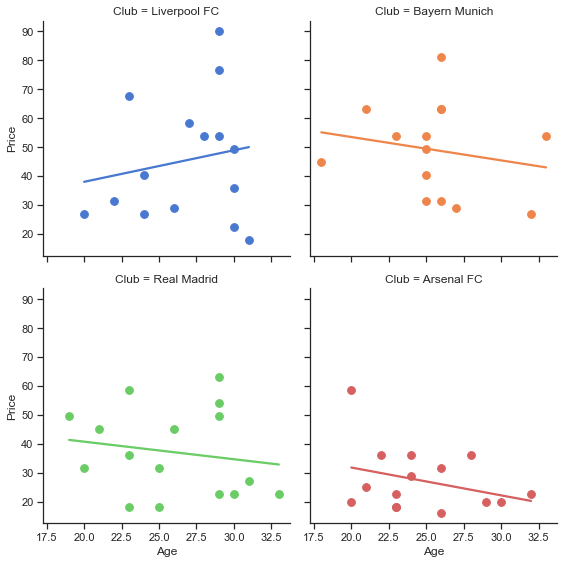

In [55]:
sns.lmplot(x="Age", y="Price", col="Club", hue="Club", data=test_play1,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 60, "alpha": 1})

# Scatterplot with multiple semantics
[sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)

<AxesSubplot:xlabel='carat', ylabel='price'>

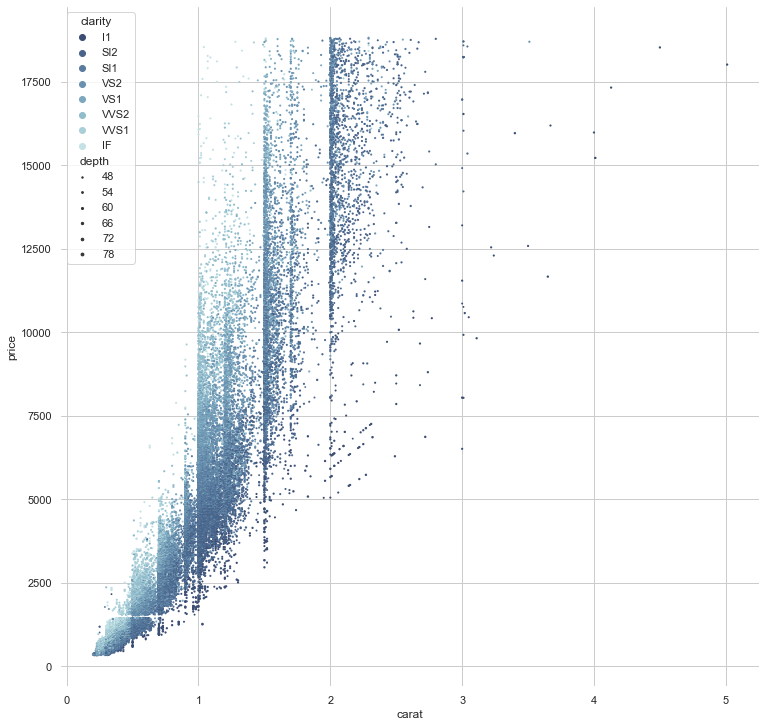

In [34]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(12.5, 12.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

<AxesSubplot:xlabel='Matches', ylabel='Price'>

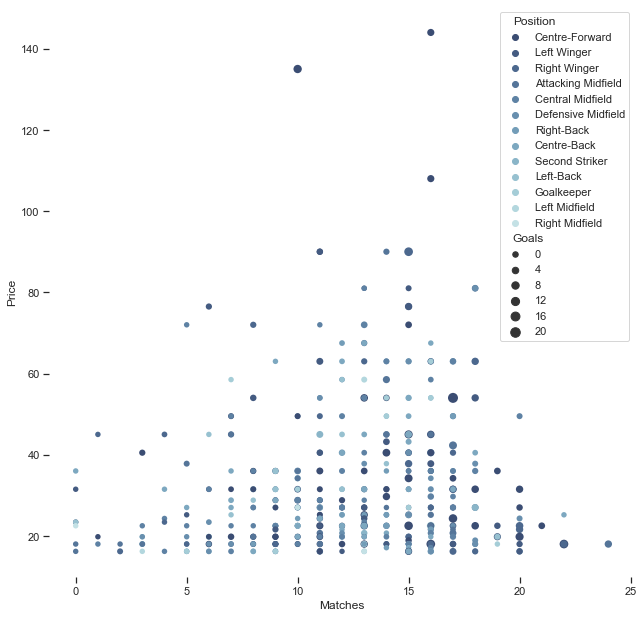

In [47]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10.5, 10.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Matches", y="Price",
                hue="Position", size="Goals",
                palette="ch:r=-.2,d=.3_r",
                sizes=(30, 100), linewidth=0,
                data=players, ax=ax)

# Timeseries plot with error bands
[sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot)

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

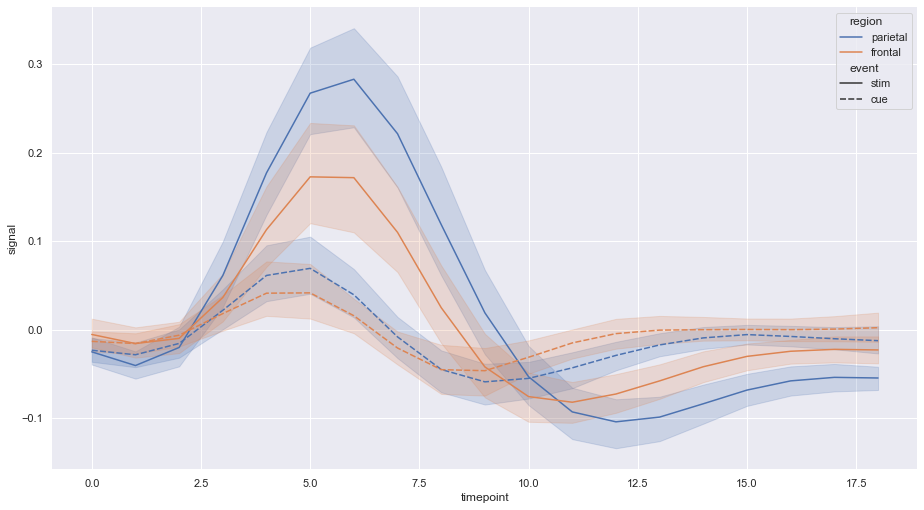

In [179]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15.5, 8.5))
sns.despine(f, left=True, bottom=True)
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

<AxesSubplot:xlabel='Age', ylabel='Matches'>

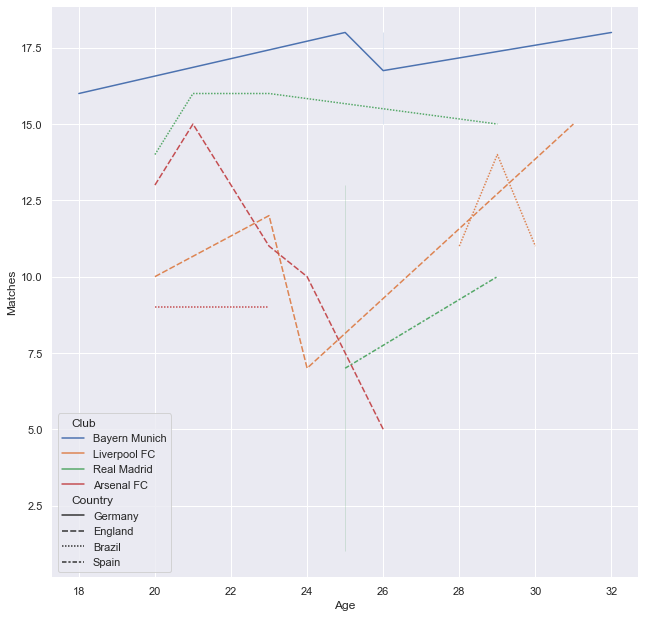

In [64]:
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(10.5, 10.5))
sns.despine(f, left=True, bottom=True)
sns.lineplot(x="Age", y="Matches",
             hue="Club", style="Country",
             data=test_play2)

# Facetting histograms by subsets of data
[sns.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

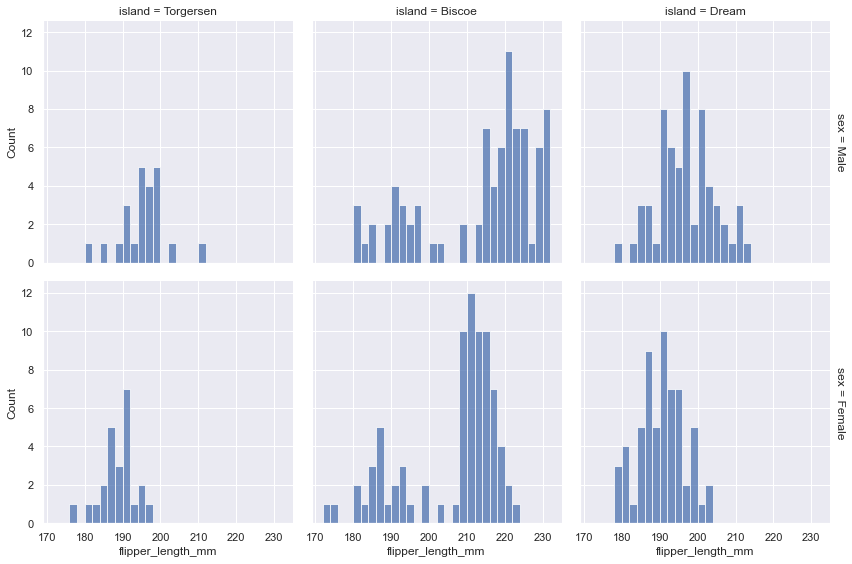

In [86]:
sns.set_theme(style='darkgrid')
sns.displot(
    penguin, x="flipper_length_mm", col="island", row="sex",
    binwidth=2, height=4, facet_kws=dict(margin_titles=True),
)

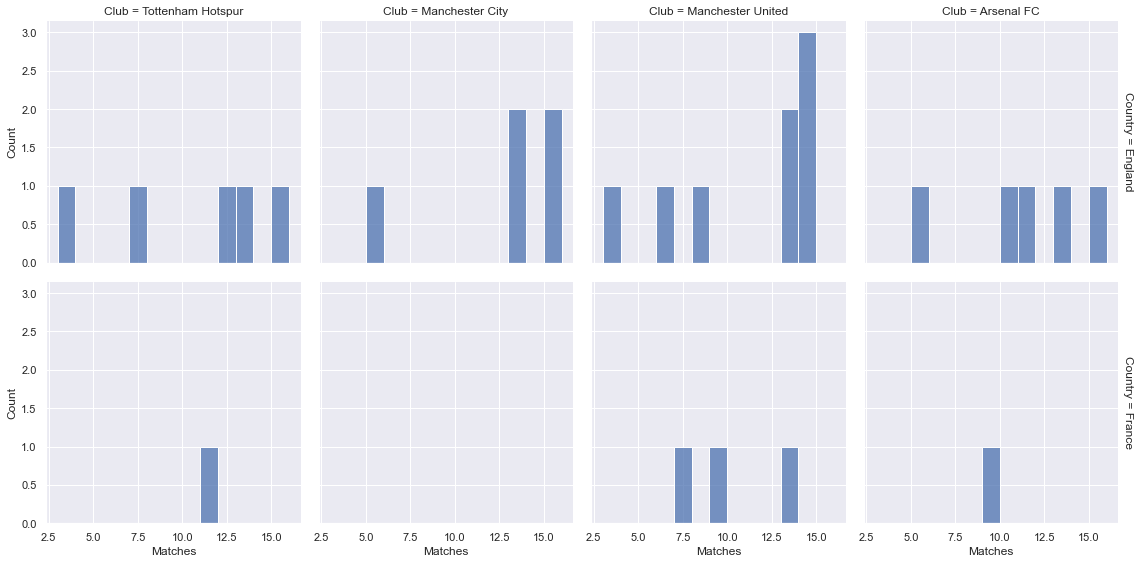

In [99]:
sns.set_theme(style='darkgrid')
sns.displot(
    test_play3, x="Matches", col="Club", row="Country",
    binwidth=1, height=4, facet_kws=dict(margin_titles=True),
)

# Line plots on multiple facets
[sns.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

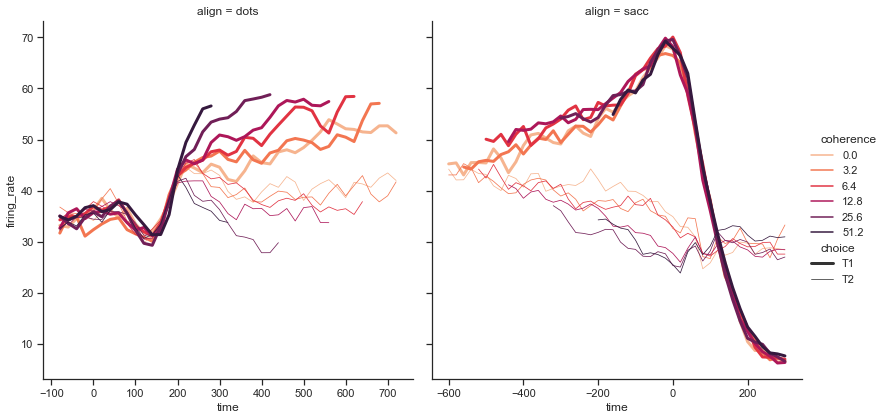

In [109]:
sns.set_theme(style="ticks")
palette = sns.color_palette("rocket_r")
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=6, aspect=.95, facet_kws=dict(sharex=False),
)

# Grouped barplots
[sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)

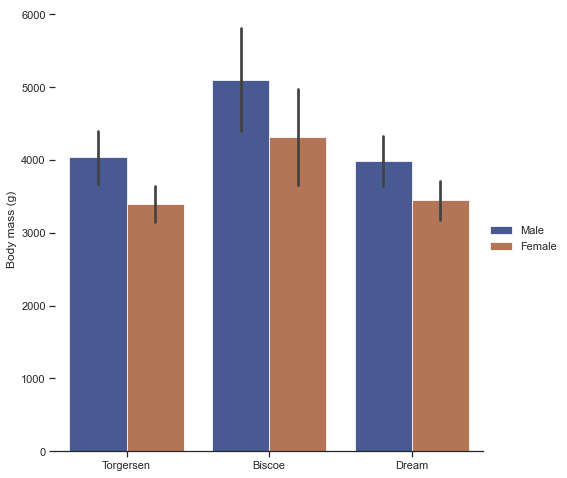

In [133]:
g = sns.catplot(
    data=penguin, kind="bar",
    x="island", y="body_mass_g", hue="sex",
    ci="sd", palette="dark", alpha=.76, height=7
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

# Grouped boxplots
[sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)

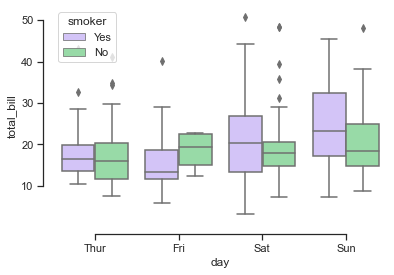

In [149]:
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

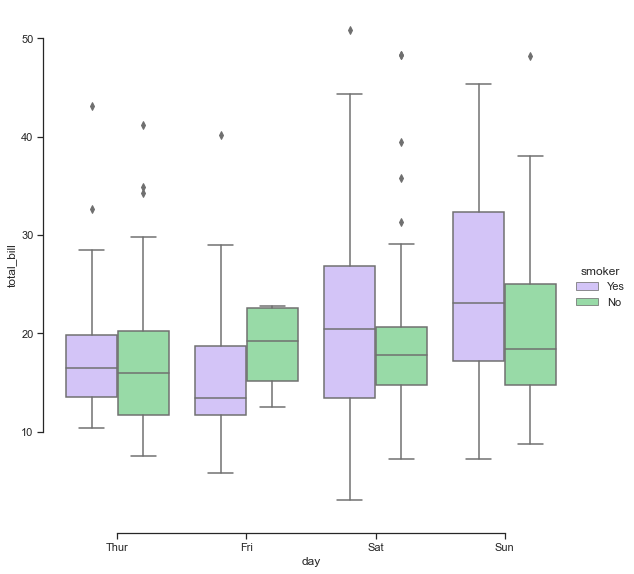

In [147]:
sns.catplot(
    data=tips, kind="box",
    x="day", y="total_bill", hue="smoker", palette=["m", "g"], height=8
)
sns.despine(offset=10, trim=True)

# Grouped violinplot with split violins
[sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)

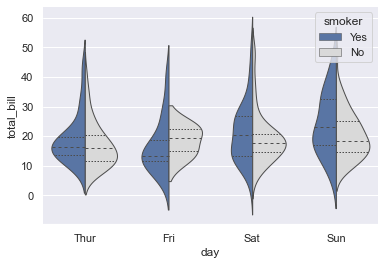

In [162]:
sns.set_theme(style="darkgrid")
sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1,
               palette={"Yes": "b", "No": ".85"})
sns.despine(left=True)

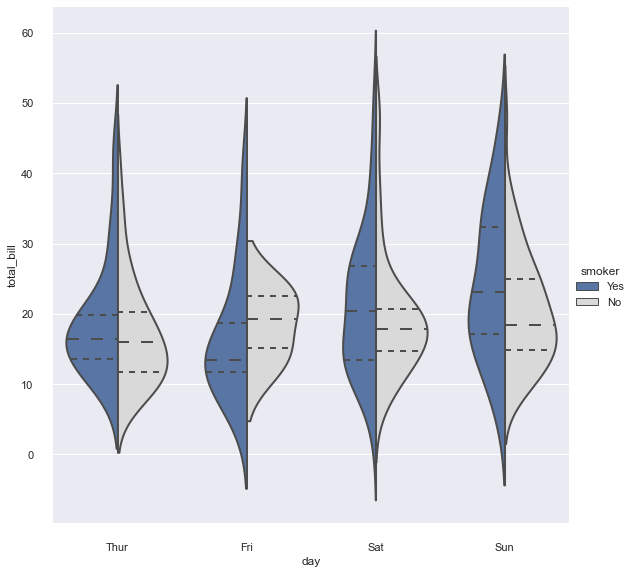

In [169]:
sns.set_theme(style="darkgrid")
sns.catplot(
    data=tips, kind="violin",
    x="day", y="total_bill", hue="smoker", split=True, inner="quart", linewidth=2, \
    palette={"Yes": "b", "No": ".85"}, height=8
)
sns.despine(offset=10, trim=True)

# Scatterplot heatmap
[sns.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

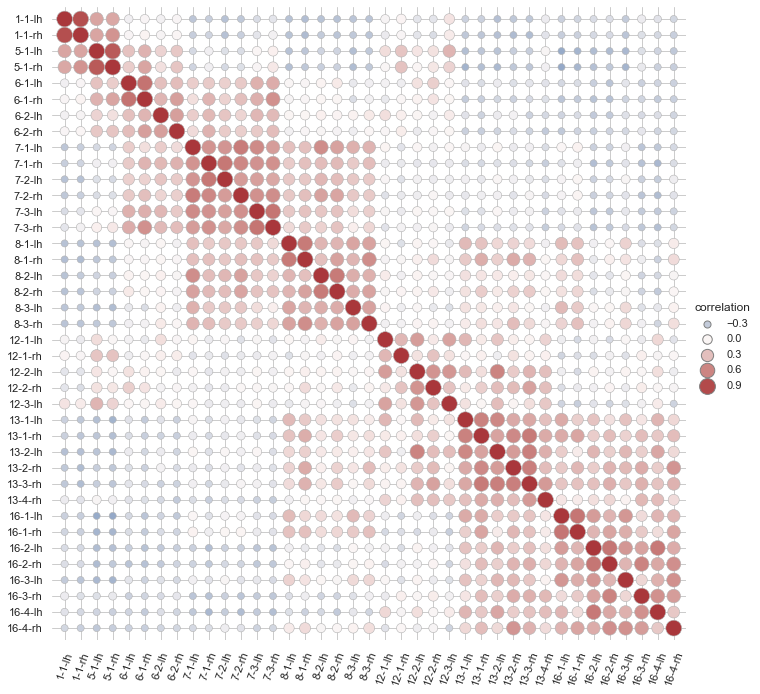

In [215]:
sns.set_theme(style="whitegrid")
used_networks = [1, 5, 6, 7, 8, 12, 13, 16]
used_columns = (dfe.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
dfer = dfe.loc[:, used_columns]
dfer.columns = dfer.columns.map("-".join)
corr_mat = dfer.corr().stack().reset_index(name="correlation")
#hue_norm - [x,y] between norm
#edgecolor - circles border
#sizes and size_norm - [x,y] from lil to big
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="", ylabel="", aspect="equal")
#delete plot borders
g.despine(left=True, bottom=True)
#distance from borders
g.ax.margins(.02)
#angle of inclination
for label in g.ax.get_xticklabels():
    label.set_rotation(70)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".5")

# Hexbin plot with marginal distributions
[sns.joinplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)

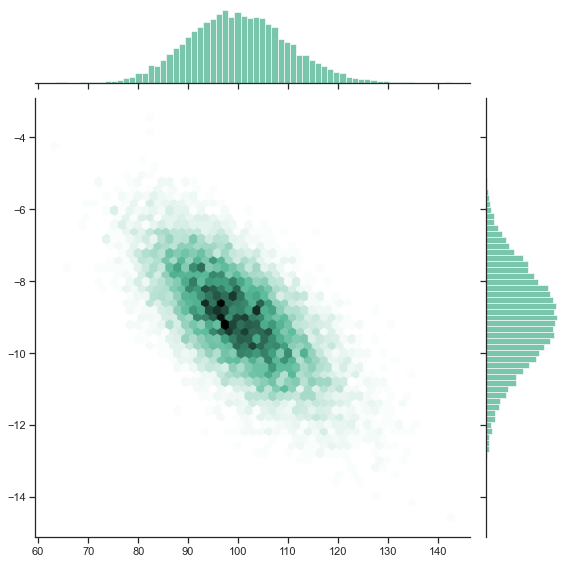

In [236]:
sns.set_theme(style="ticks")

rs = np.random.RandomState(30)
x = rs.gamma(100, size=10000)
y = -.090 * x + rs.normal(size=10000)

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391", height=8)

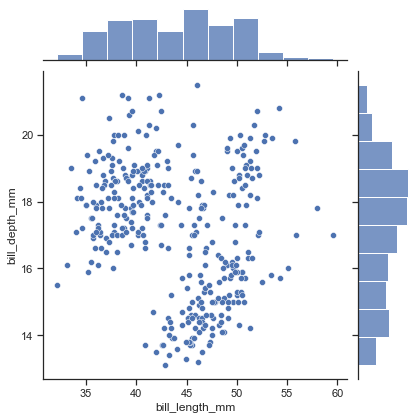

In [228]:
sns.jointplot(data=penguin, x="bill_length_mm", y="bill_depth_mm")

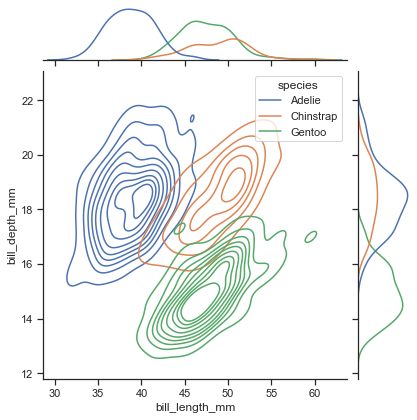

In [230]:
sns.jointplot(data=penguin, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")


# Stacked histogram on a log scale
[sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

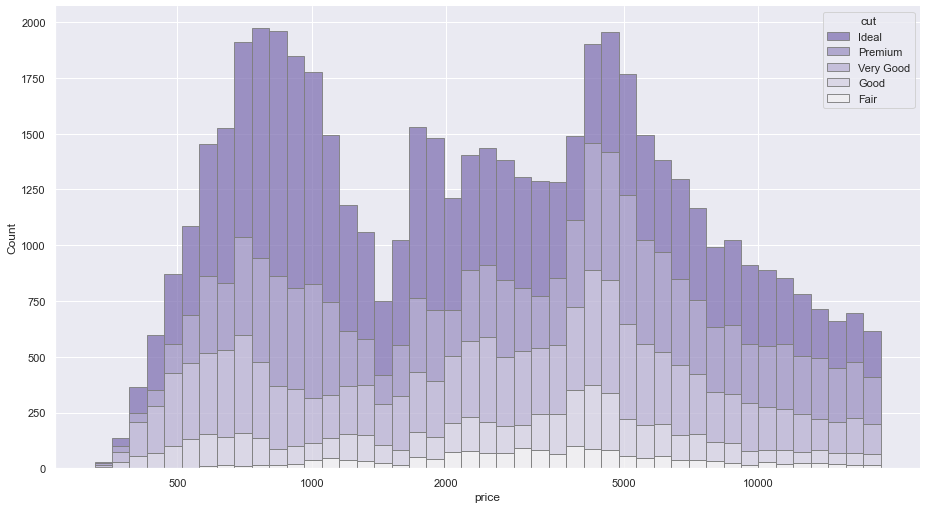

In [253]:
sns.set_theme(style='darkgrid')
f, ax = plt.subplots(figsize=(15.5, 8.5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".5",
    linewidth=.9,
    log_scale=True,
)
#change bottom price
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

# Horizontal boxplot with observations
[sns.boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot), [sns.stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot)

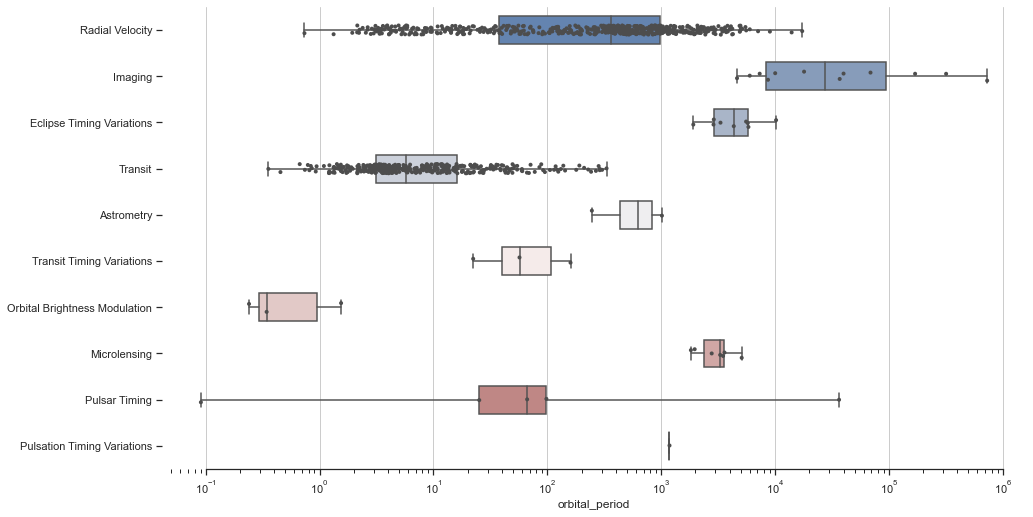

In [280]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15.5, 8.5))
#600000 to 10^5 
ax.set_xscale("log")
sns.boxplot(x="orbital_period", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="orbital_period", y="method", data=planets,
              size=4, color=".3", linewidth=0)
#vertical lines
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

# Relational plots - Реляционные графики/модели
## [sns.relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)
- 1.[sns.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) - dots
- 2.[sns.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) - line

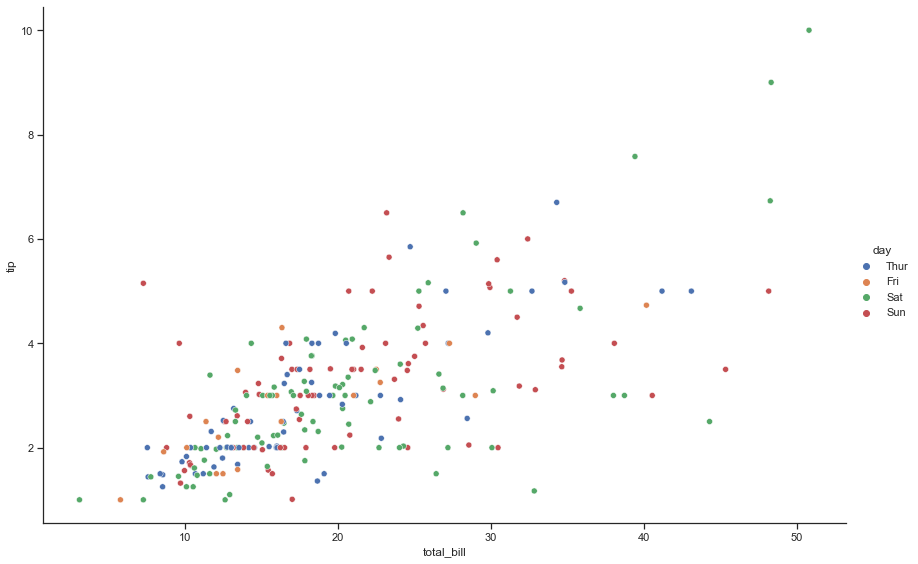

In [295]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", height=8, aspect=1.5)

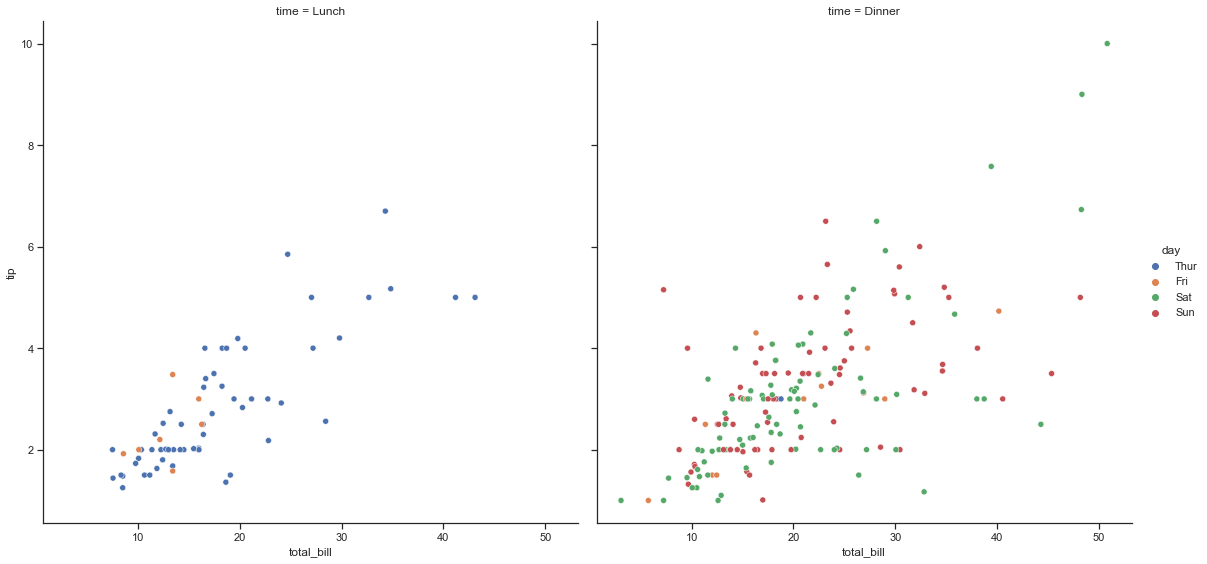

In [296]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", height=8, col='time')

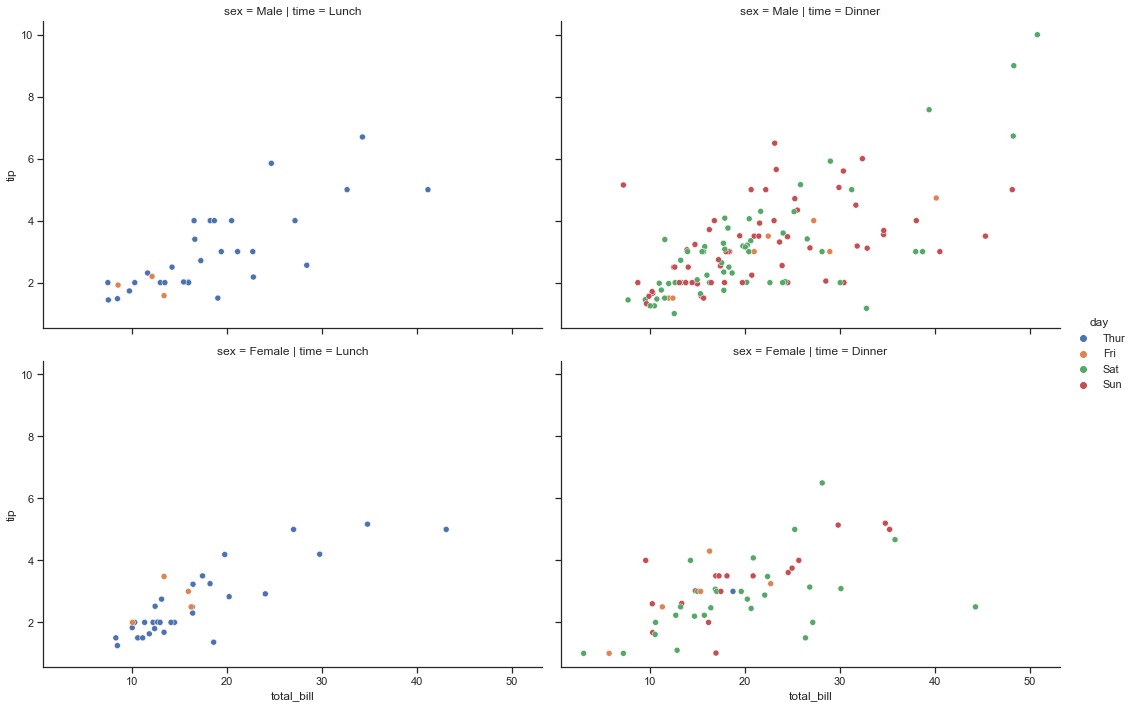

In [298]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex", aspect=1.5)

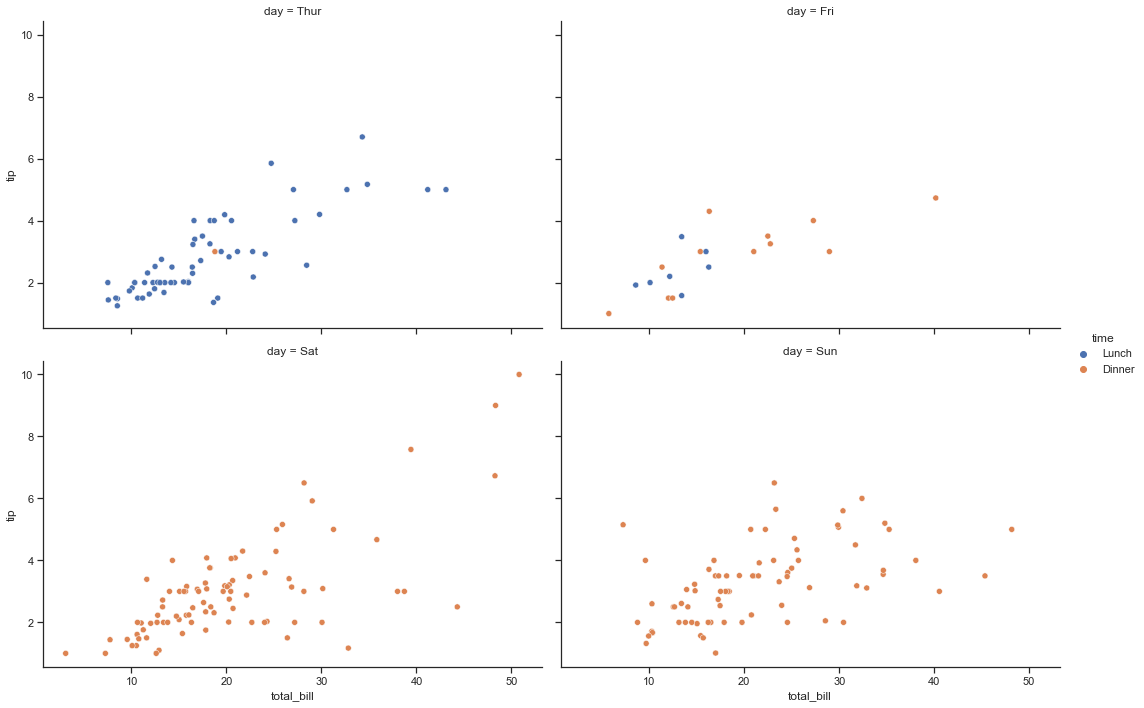

In [299]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day", col_wrap=2, aspect=1.5)

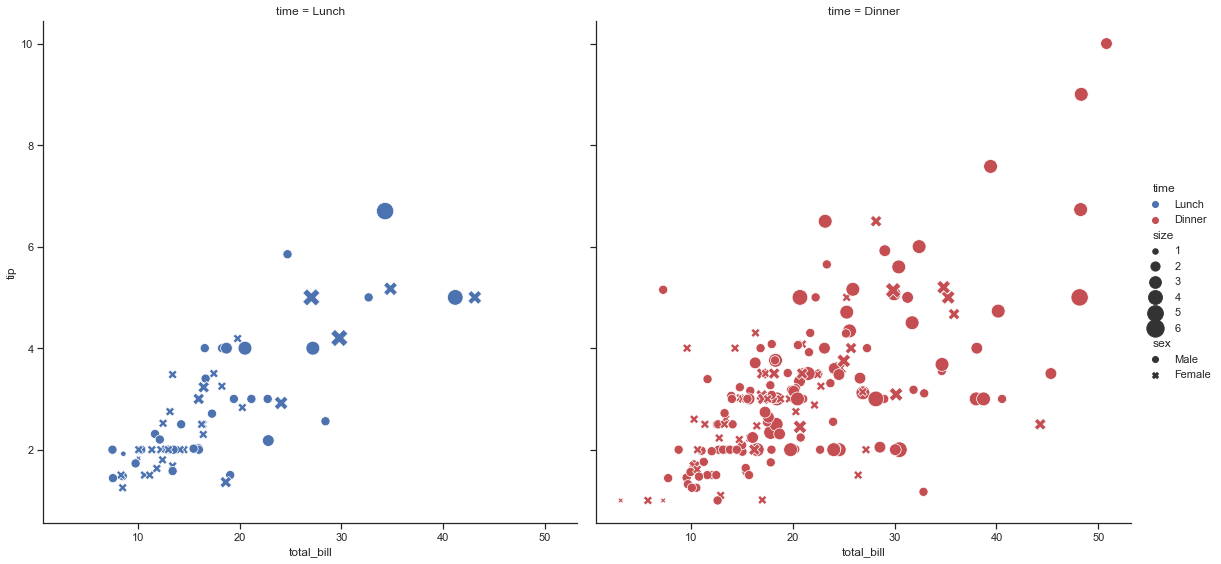

In [306]:
sns.relplot(
    data=tips, x="total_bill", y="tip", col="time",
    hue="time", size="size", style="sex",
    palette=["b", "r"], sizes=(30, 300),height=8
)

### Line

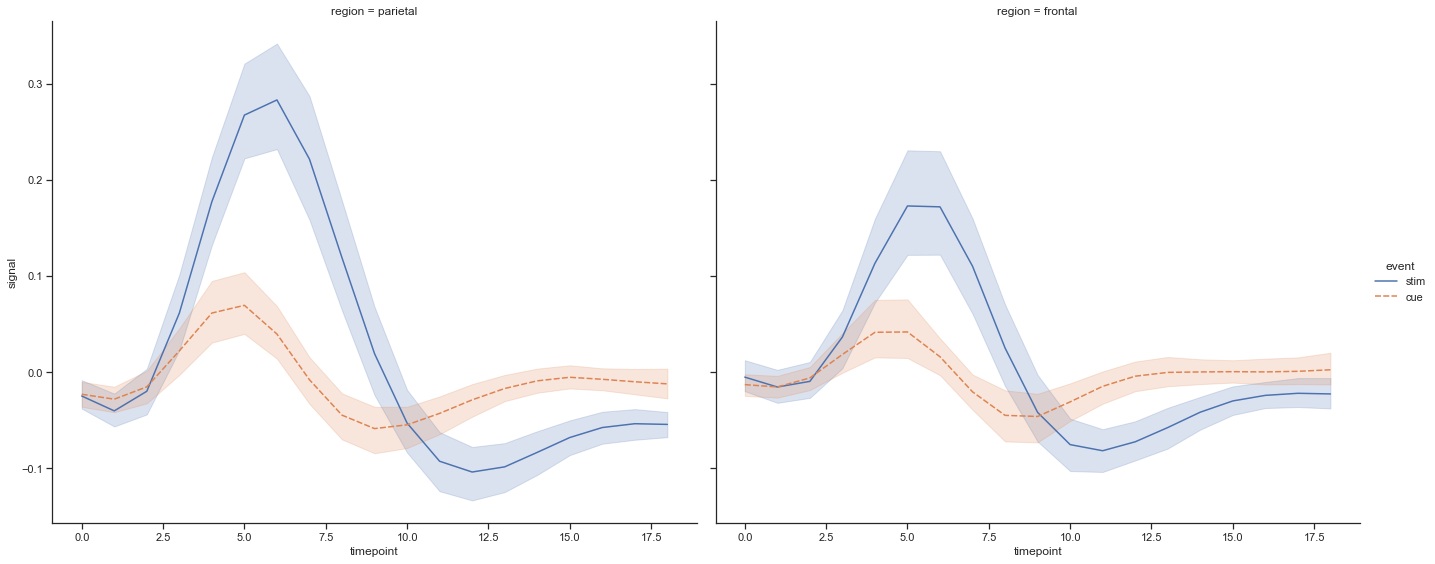

In [313]:
sns.relplot(
    data=fmri, x="timepoint", y="signal", col="region",
    hue="event", style="event", kind="line", height=8, aspect=1.2
)

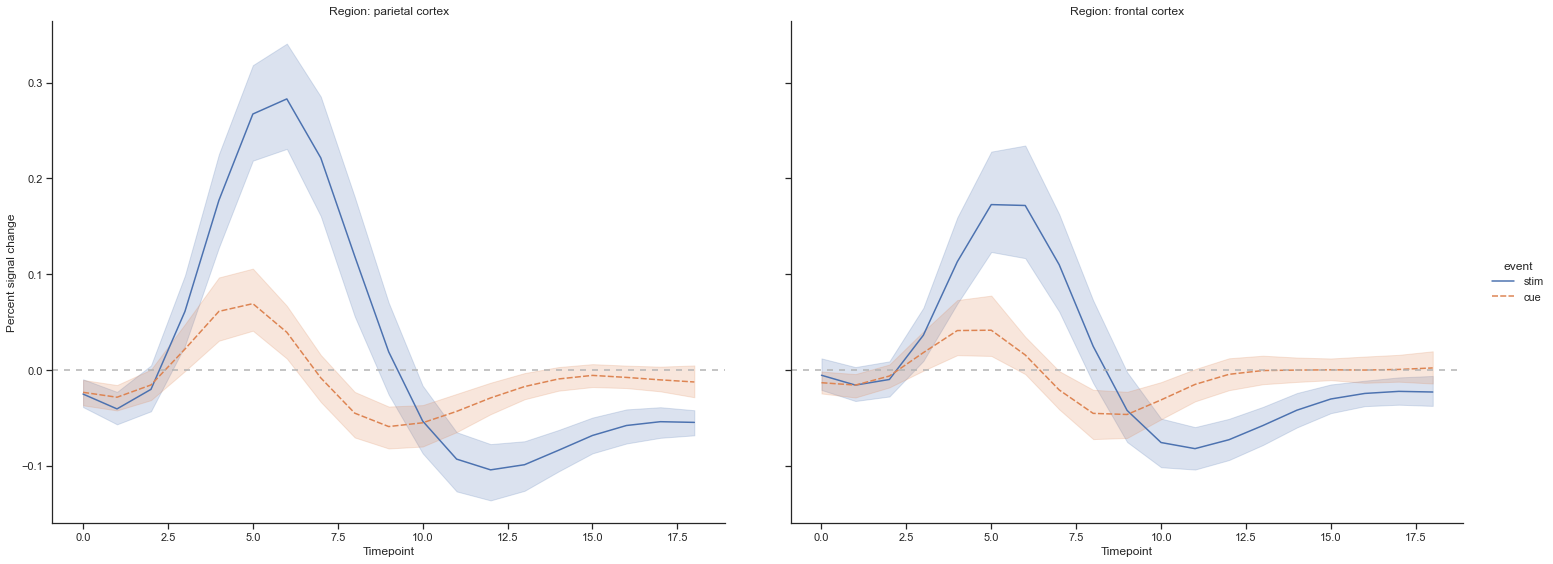

In [328]:
g = sns.relplot(
    data=fmri,
    x="timepoint", y="signal",
    hue="event", style="event", col="region",
    height=8, aspect=1.3, kind="line"
)
#axhline - main line
#dashes - dotted line
#tight_layout - distanse between graphics
(g.map(plt.axhline, y=0, color=".7", dashes=(4, 4))
  .set_axis_labels("Timepoint", "Percent signal change")
  .set_titles("Region: {col_name} cortex")
  .tight_layout(w_pad=5))

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

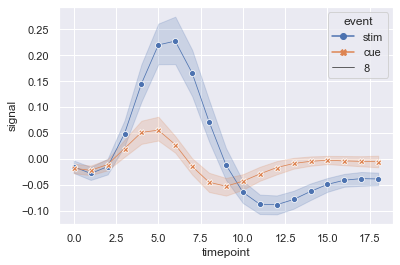

In [336]:
sns.lineplot(
    data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False
)

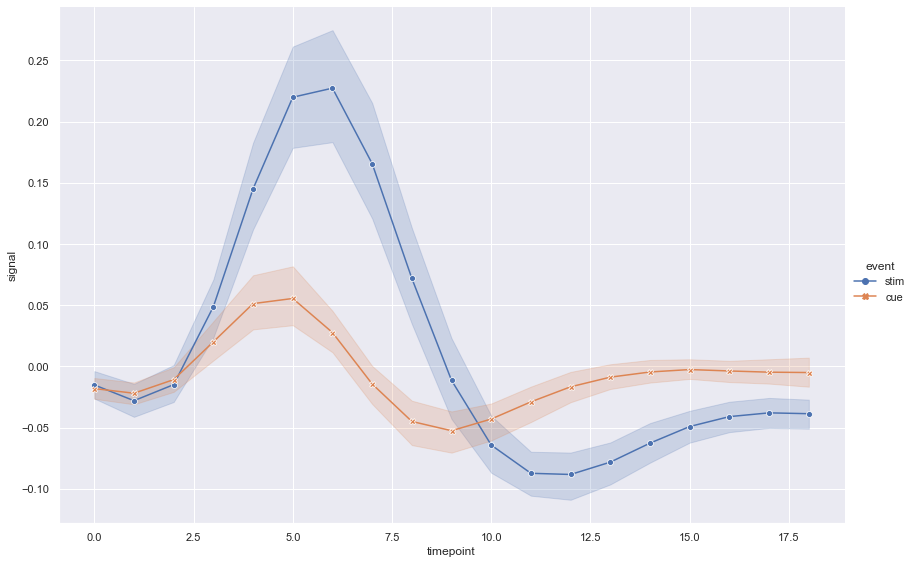

In [339]:
sns.relplot(data=fmri,
    x="timepoint", y="signal", hue="event", style="event",
    markers=True, dashes=False, kind='line', height=8, aspect=1.5)

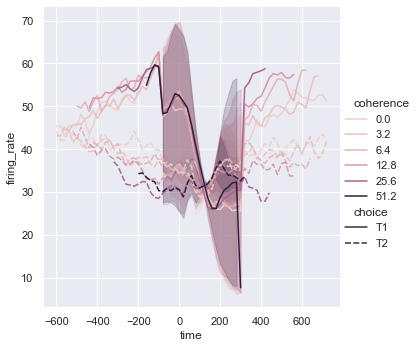

In [344]:
sns.relplot(
    data=dots, x="time", y="firing_rate", hue="coherence", style="choice", kind='line'
)

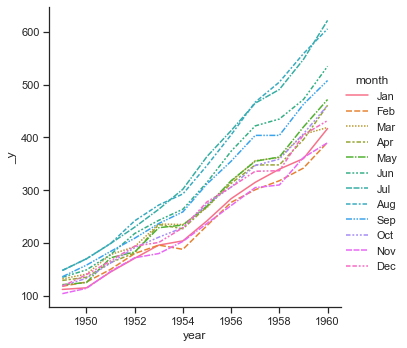

In [330]:
sns.relplot(data=flights_wide, kind="line")

### Dots

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

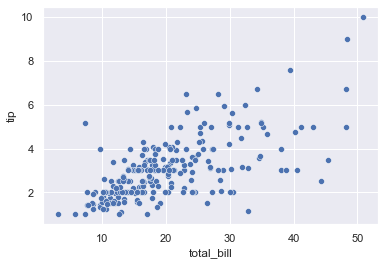

In [332]:
sns.set_style(style='darkgrid')
sns.scatterplot(data=tips, x="total_bill", y="tip")

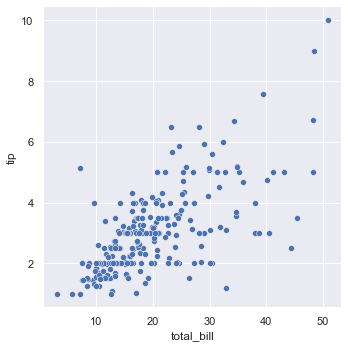

In [333]:
sns.set_style(style='darkgrid')
sns.relplot(data=tips, x="total_bill", y="tip")

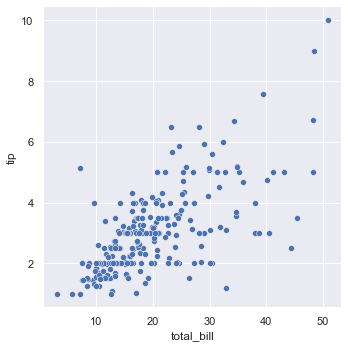

In [334]:
sns.set_style(style='darkgrid')
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter')

# Distribution plots - Распределение
## [sns.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)
- [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) (with kind="hist"; the default) - histogram
- [sns.kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot) (with kind="kde") - histogram line + puddle
- [sns.ecdfplot](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html#seaborn.ecdfplot) (with kind="ecdf"; univariate-only) - ladder  

## [sns.rugplot](https://seaborn.pydata.org/generated/seaborn.rugplot.html#seaborn.rugplot) - scatterplot + info from borders
## [sns.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot) - DEPRECATED

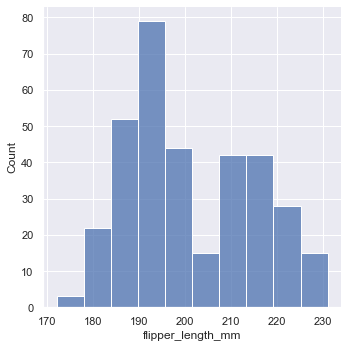

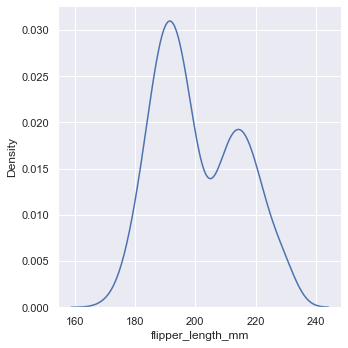

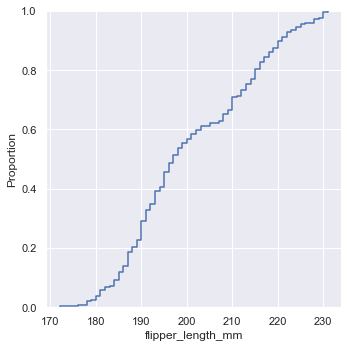

In [349]:
sns.displot(data=penguins, x="flipper_length_mm")
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")
sns.displot(data=penguins, x="flipper_length_mm", kind="ecdf")

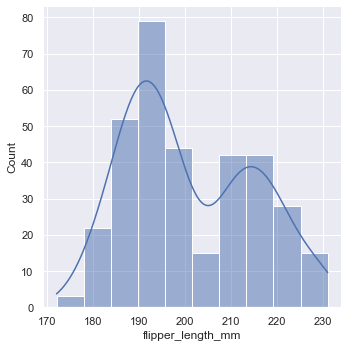

In [352]:
sns.displot(data=penguins, x="flipper_length_mm", kde=True)

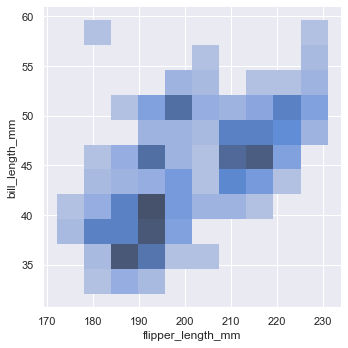

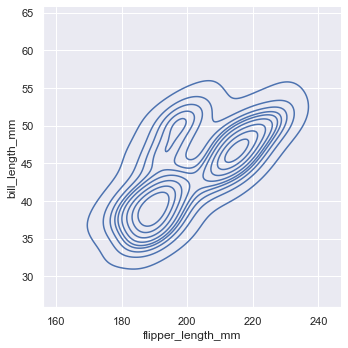

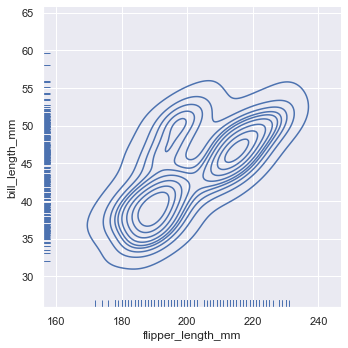

In [360]:
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm")
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde")
sns.displot(data=penguins, x="flipper_length_mm", y="bill_length_mm", kind="kde", rug=True)

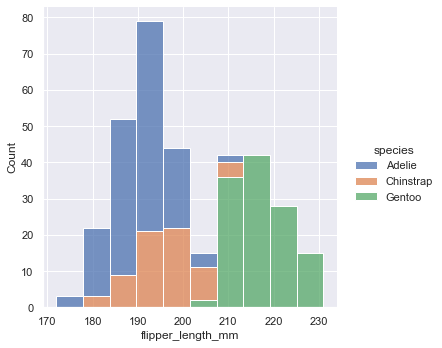

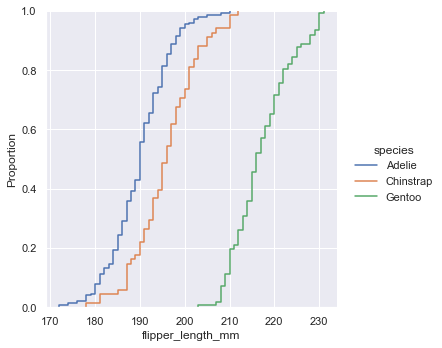

In [368]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="hist", multiple="stack")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="ecdf")

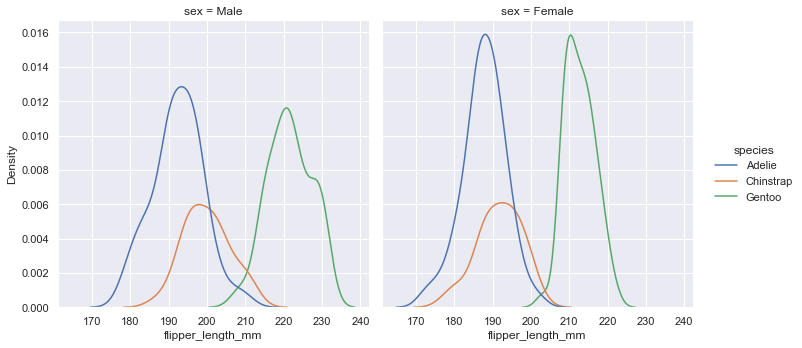

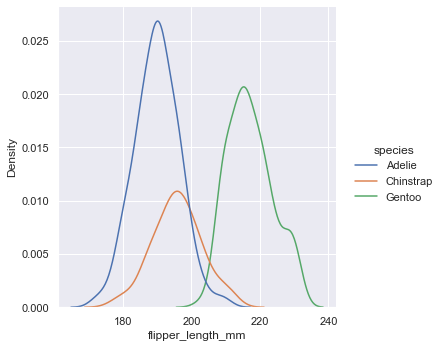

In [367]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="sex", kind="kde")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", kind="kde")


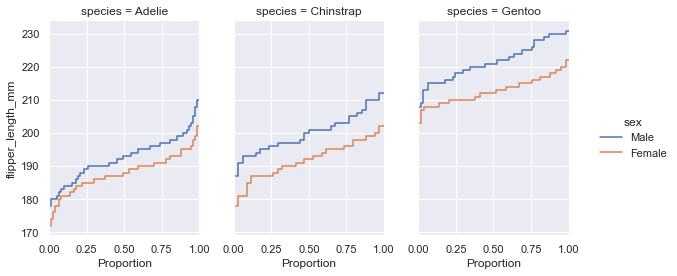

In [369]:
sns.displot(
    data=penguins, y="flipper_length_mm", hue="sex", col="species",
    kind="ecdf", height=4, aspect=.7,
)

### Elements

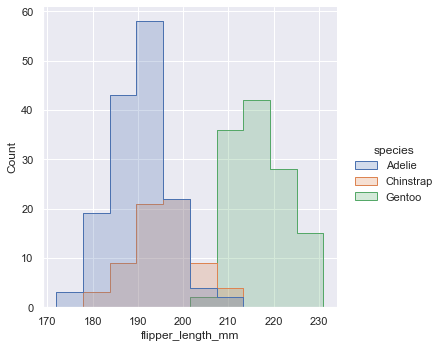

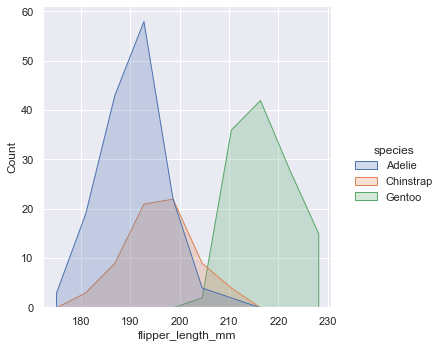

In [371]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")
sns.displot(penguins, x="flipper_length_mm", hue="species", element="poly")

### Multiple

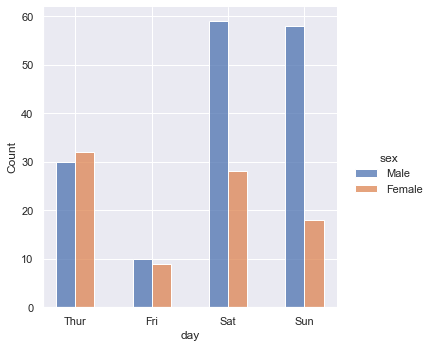

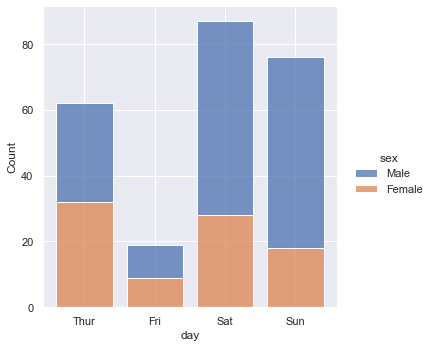

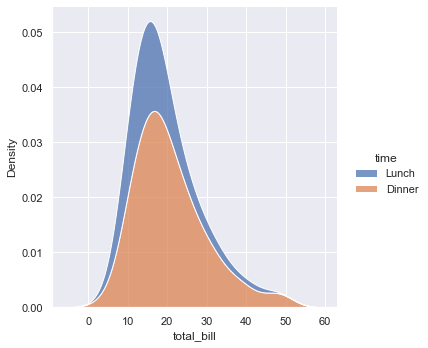

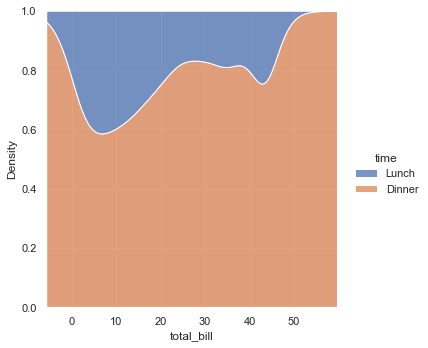

In [388]:
sns.displot(data=tips, x="day", hue="sex", multiple="dodge", shrink=.5)
sns.displot(data=tips, x="day", hue="sex", multiple="stack", shrink=.8)
sns.displot(data=tips, x="total_bill", hue="time", multiple="stack", kind='kde')
sns.displot(data=tips, x="total_bill", hue="time", multiple="fill", kind='kde')



### Log

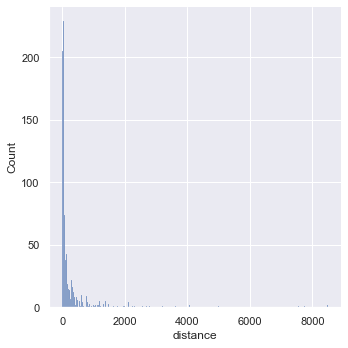

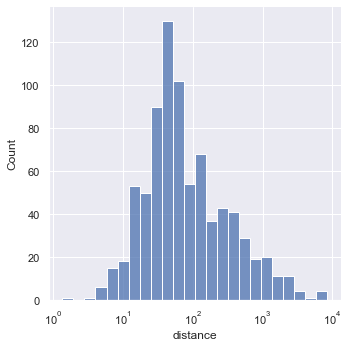

In [382]:
sns.displot(data=planets, x="distance")
sns.displot(data=planets, x="distance", log_scale=True)

### Fill

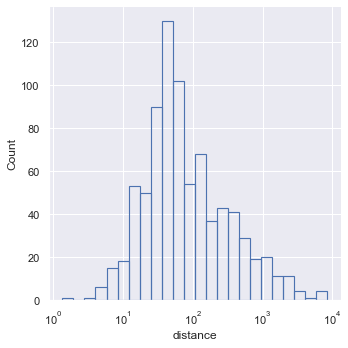

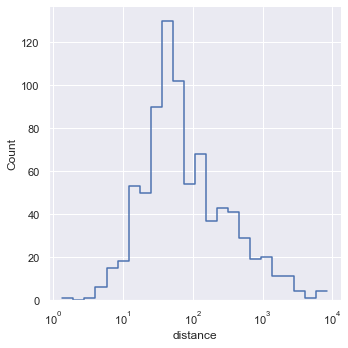

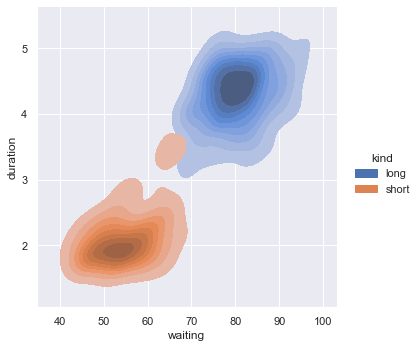

In [391]:
sns.displot(data=planets, x="distance", log_scale=True, fill=False)
sns.displot(data=planets, x="distance", log_scale=True, fill=False, element='step')
sns.displot(
    data=geyser, x="waiting", y="duration", hue="kind", fill=True, kind='kde'
)

### Discrete

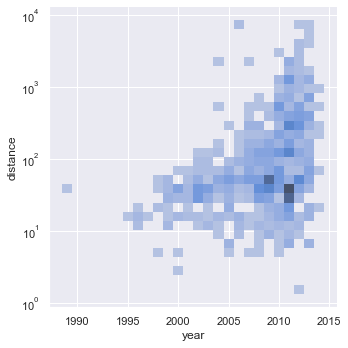

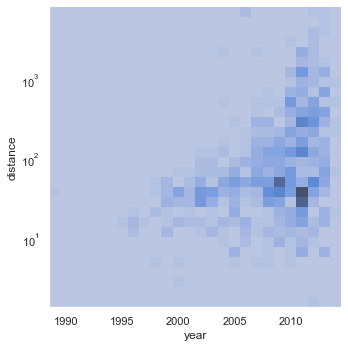

In [386]:
sns.displot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),
)
sns.displot(
    planets, x="year", y="distance",
    bins=30, discrete=(True, False), log_scale=(False, True),thresh=None
)

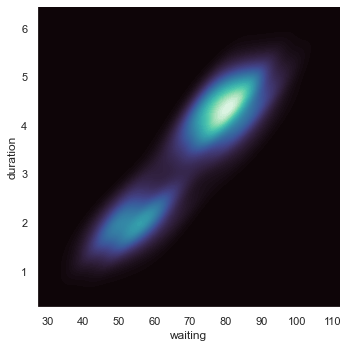

In [392]:
sns.displot(
    data=geyser, x="waiting", y="duration",
    fill=True, thresh=0, levels=100, cmap="mako",kind='kde'
)

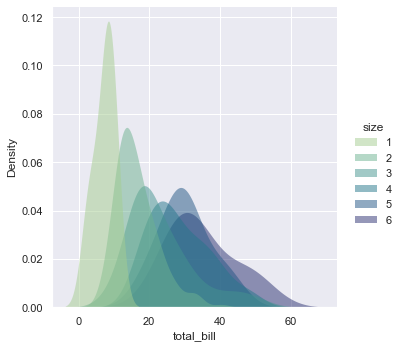

In [393]:
sns.displot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0, kind='kde'
)

<AxesSubplot:xlabel='carat', ylabel='price'>

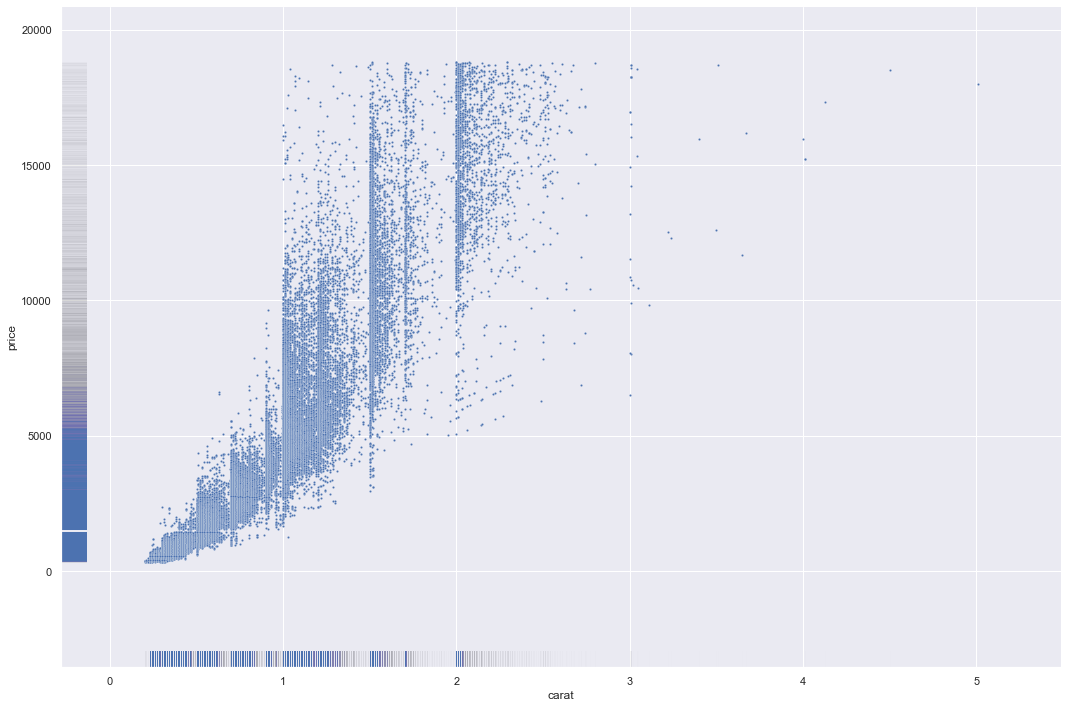

In [400]:
sns.relplot(data=diamonds, x="carat", y="price", s=5, height=10, aspect=1.5)
sns.rugplot(data=diamonds, x="carat", y="price", lw=1, alpha=.005,)

# Categorical plots - Графики категориального распределения
## [sns.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot)
- [stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot) (with kind="strip"; the default) - dots as strip
- [swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) (with kind="swarm") - dots as tree
- [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot) (with kind="box") - Japanese candle
- [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) (with kind="violin") - Vagina
- [boxenplot](https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot) (with kind="boxen") - Hanoi Towers
- [pointplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot) (with kind="point") - two segments and one median
- [barplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.barplot) (with kind="bar") - just candle
- [countplot](https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.countplot) (with kind="count") - improvised histogram (looks like a multiple="dodge")

### sns.stripplot

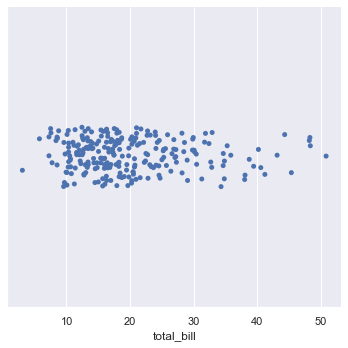

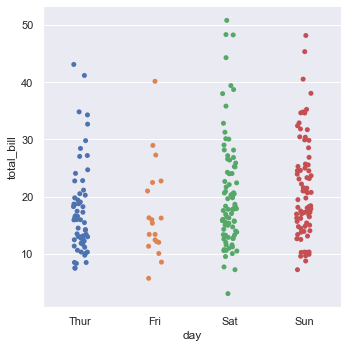

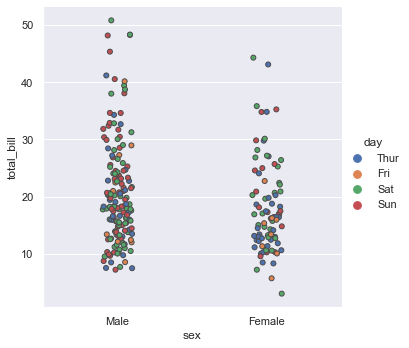

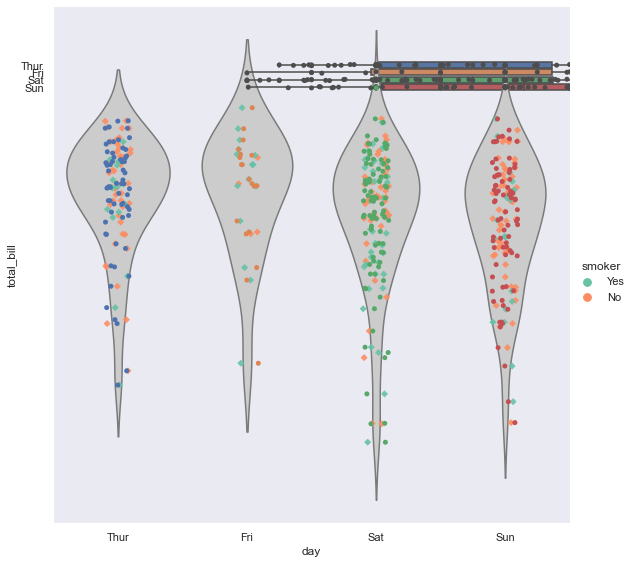

In [434]:
sns.catplot(data=tips, x="total_bill", kind='strip')
sns.catplot(x="day", y="total_bill", data=tips)
sns.catplot(x="sex", y="total_bill", hue="day", data=tips, linewidth=1)
sns.catplot(x="day", y="total_bill", hue="smoker",
                   data=tips, palette="Set2", height=8, marker="D",
                   edgecolor="gray", alpha=.9)
ba = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ba = sns.stripplot(x="tip", y="day", data=tips, color=".3")

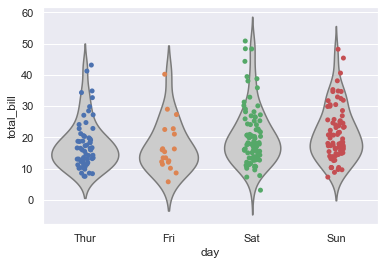

In [446]:
ax = sns.violinplot(x="day", y="total_bill", data=tips,
                     inner=None, color=".8")
ax = sns.stripplot(x="day", y="total_bill", data=tips)

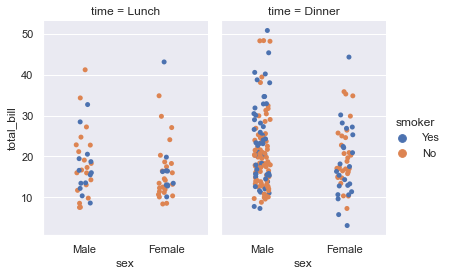

In [435]:
sns.catplot(x="sex", y="total_bill",
                 hue="smoker", col="time",
                 data=tips, kind="strip",
                 height=4, aspect=.7);

### sns.swarmplot

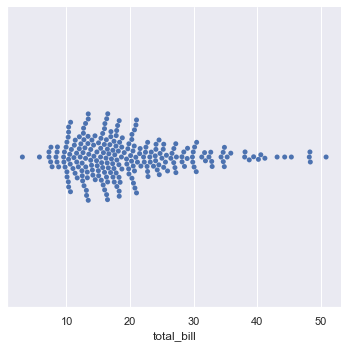

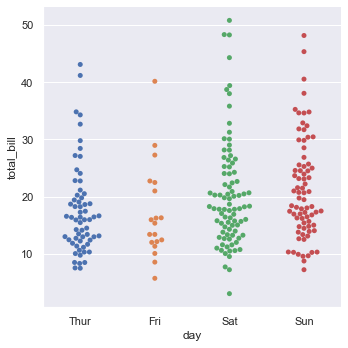

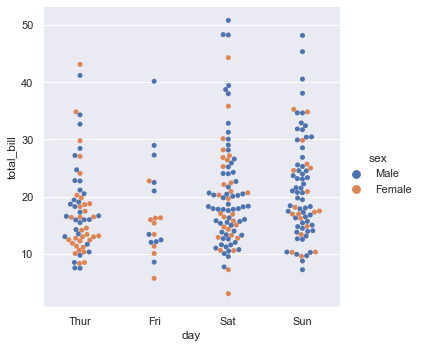

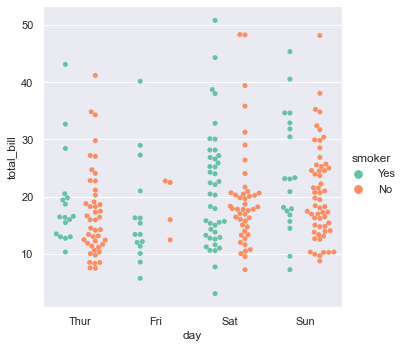

In [445]:
sns.catplot(x="total_bill",data=tips, kind="swarm")
sns.catplot(x="day", y="total_bill", data=tips, kind="swarm")
sns.catplot(x="day", y="total_bill", hue="sex", data=tips,kind="swarm")
sns.catplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set2", dodge=True, kind="swarm")

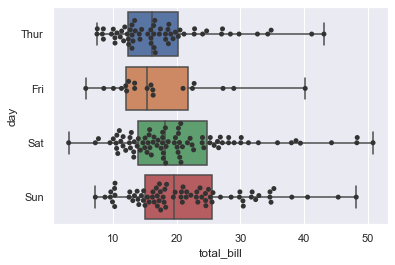

In [443]:
ax = sns.boxplot(x="total_bill", y="day", data=tips, whis=np.inf)
ax = sns.swarmplot(x="total_bill", y="day", data=tips, color=".2")

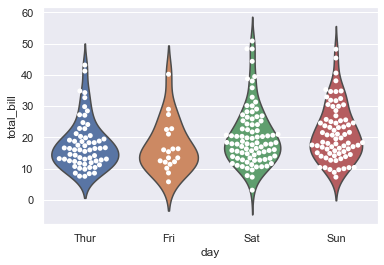

In [447]:
ax = sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
ax = sns.swarmplot(x="day", y="total_bill", data=tips,
                   color="white", edgecolor="gray")